In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from subprocess import check_output

In [4]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_excel('turnover_data.xlsx')

In [6]:
import tensorflow as tf

In [7]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0)
print(node1, node2)

tf.Tensor(3.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32)


In [8]:
print(df.columns.values)

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'sales' 'salary']


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
df.describe(include=['O'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [14]:
df['salary']=df['salary'].map({'high':2,'medium':1, 'low':0}).astype(int)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [15]:
old=[]
old = set()
for obj in df['sales']:
    if obj not in old:
        print(obj)
        old.add(obj)      

sales
accounting
hr
technical
support
management
IT
product_mng
marketing
RandD


In [16]:
unique_sales = df['sales'].unique()
print(unique_sales)

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [17]:
df['sales'] = df['sales'].map({
    'sales': 9, 
    'accounting': 8, 
    'hr': 7,
    'technical': 6, 
    'support': 5, 
    'management': 4, 
    'IT': 3,
    'product_mng': 2,
    'marketing': 1, 
    'RandD': 0}).astype(float)

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,9.0,0
1,0.80,0.86,5,262,6,0,1,0,9.0,1
2,0.11,0.88,7,272,4,0,1,0,9.0,1
3,0.72,0.87,5,223,5,0,1,0,9.0,0
4,0.37,0.52,2,159,3,0,1,0,9.0,0


                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
sales                           -0.015413        -0.011855       -0.005577   
salary                           0.050022        -0.013002       -0.001803   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_ev

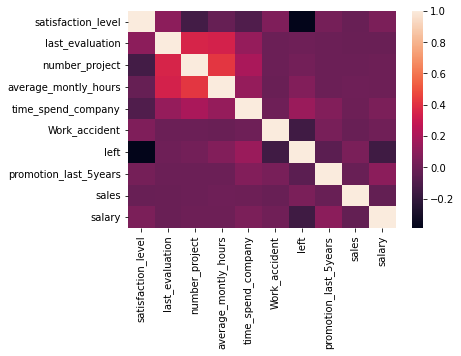

In [19]:
corr = df.corr()
corr=(corr)
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# If you want to print out the correlation matrix as well:
print(corr)


In [20]:
df[['left', 'satisfaction_level']].groupby(['left'], as_index=False).mean().sort_values(by='satisfaction_level', ascending=False)                                          

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [21]:
df[['left', 'Work_accident']].groupby(['left'], as_index=False).mean().sort_values(by='Work_accident', ascending=False)

,left,Work_accident
0,0,0.175009
1,1,0.047326


In [22]:
df[['left', 'time_spend_company']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='left', ascending=False)

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


In [23]:
df[['left', 'salary']].groupby(['salary'], as_index=False).mean().sort_values(by='left', ascending=False)

,salary,left
0,0,0.296884
1,1,0.204313
2,2,0.066289


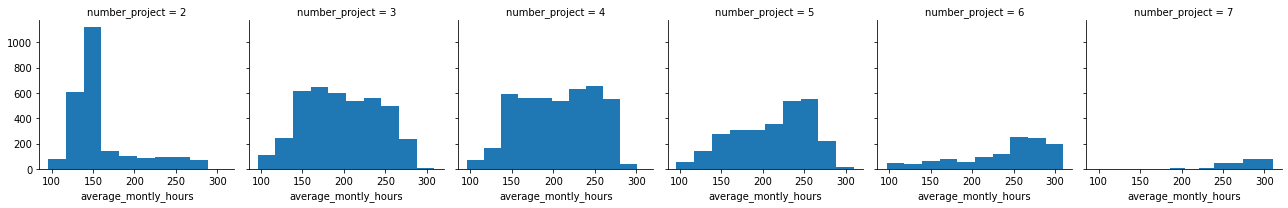

In [24]:
g = sns.FacetGrid(df, col='number_project')
g.map(plt.hist, "average_montly_hours", bins=10)
plt.show()

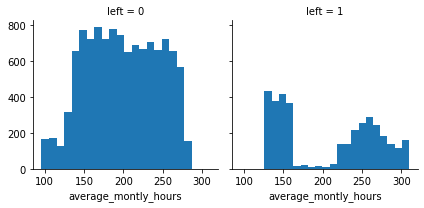

In [25]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, "average_montly_hours", bins=20)
plt.show()

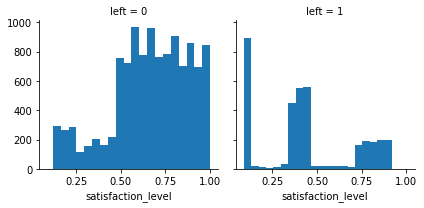

In [26]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, "satisfaction_level", bins=20)
plt.show()

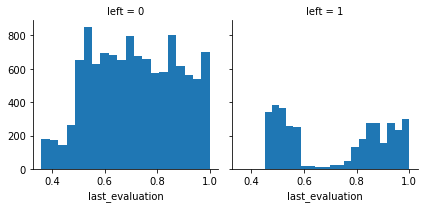

In [27]:
df.loc[ df['satisfaction_level'] <= 0.25, 'satisfaction_level'] = 0
df.loc[(df['satisfaction_level'] > 0.25) & (df['satisfaction_level']
<= 0.5), 'satisfaction_level'] = 1
df.loc[(df['satisfaction_level'] > 0.5) & (df['satisfaction_level'] <=
0.75), 'satisfaction_level'] = 0
df.loc[ df['satisfaction_level'] > 0.75, 'satisfaction_level'] = 1
df['satisfaction_level'] = df['satisfaction_level'].astype(int)
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'last_evaluation', bins=20)

In [28]:
df.loc[ df['last_evaluation'] <= 0.56, 'last_evaluation'] = 0
df.loc[(df['last_evaluation'] > 0.56) & (df['last_evaluation'] <=
0.80), 'last_evaluation'] = 1
df.loc[ df['last_evaluation'] > 0.80, 'last_evaluation'] = 0
df['last_evaluation'] = df['last_evaluation'].astype(int)

In [29]:
df["proj*hour"] = df.number_project * df.average_montly_hours
df.loc[:,
['proj*hour','number_project','average_montly_hours']].head(10)

,proj*hour,number_project,average_montly_hours
0,314,2,157
1,1310,5,262
2,1904,7,272
3,1115,5,223
4,318,2,159
5,306,2,153
6,1482,6,247
7,1295,5,259
8,1120,5,224
9,284,2,142


In [30]:
df = df.drop(['number_project','average_montly_hours'], axis=1)

In [31]:
nHead = int(len(df)*0.85)
nTail = int(len(df)*0.15)
X_train = df.drop("left", axis=1).head(nHead)
X_test = df.drop("left", axis=1).tail(nTail)
Y_train = df["left"].head(nHead)
Y_test = df["left"].tail(nTail)
X_train.shape, X_test.shape

((12749, 8), (2249, 8))

Modeling with dataset

There are several modeling strategies. Here we list three distinct ones and test out which
one works best.

Support Vector Machines

support vector machines (SVMs, also support vector networks[1]) are supervised learning
models with associated learning algorithms that analyze data used for classification and
regression analysis. Given a set of training examples, each marked as belonging to one or
the other of two categories, an SVM training algorithm builds a model that assigns new
examples to one category or the other (Wikipedia).


In [32]:
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

84.62

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

95.82

In [34]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100,
2)
acc_decision_tree

99.64